In [21]:
# Lesson in Data Transformation

import numpy as np
import pandas as pd


In [22]:
trans = pd.DataFrame({"A":[12,4,5,None,1],
                    "B":[7,2,54,3,None],
                    "C":[20,16,11,3,8],
                    "D":[14,3,None,2,6]},
                    index=['Row_1','Row_2','Row_3','Row_4','Row_5'])
trans


,A,B,C,D
Row_1,12.0,7.0,20,14.0
Row_2,4.0,2.0,16,3.0
Row_3,5.0,54.0,11,NaN
Row_4,NaN,3.0,3,2.0
Row_5,1.0,NaN,8,6.0


In [23]:
# using the transform() function to add 10 to each element of the dataframe.
result = trans.transform(lambda x : x + 10)     # used the anonymous function (lambda) to add 10 to each value.
result

,A,B,C,D
Row_1,22.0,17.0,30,24.0
Row_2,14.0,12.0,26,13.0
Row_3,15.0,64.0,21,NaN
Row_4,NaN,13.0,13,12.0
Row_5,11.0,NaN,18,16.0


In [24]:
# Data Discretization
# Converting continuous data attribute values into a finite set of intervals. 
# create a numpy array with 10 random integers between 10 and 200. 
x = np.random.randint(10, 200, size = 10)
x

array([143, 156, 181,  53,  70, 135, 103,  14, 174, 153])

In [25]:
# use cut() function from pandas to perform discretize
df = pd.DataFrame({"height":x})
df

,height
0,143
1,156
2,181
3,53
4,70
5,135
6,103
7,14
8,174
9,153


In [26]:
# create a new column 'binned' with interval
df['binned'] = pd.cut(x = df['height'], bins = [0,25,50,100,200])
df

,height,binned
0,143,"(100, 200]"
1,156,"(100, 200]"
2,181,"(100, 200]"
3,53,"(50, 100]"
4,70,"(50, 100]"
5,135,"(100, 200]"
6,103,"(100, 200]"
7,14,"(0, 25]"
8,174,"(100, 200]"
9,153,"(100, 200]"


In [27]:
df['bin_label'] = pd.cut(x = df['height'],
    bins = [0,25,50,100,200],labels = [1,2,3,4])
df

,height,binned,bin_label
0,143,"(100, 200]",4
1,156,"(100, 200]",4
2,181,"(100, 200]",4
3,53,"(50, 100]",3
4,70,"(50, 100]",3
5,135,"(100, 200]",4
6,103,"(100, 200]",4
7,14,"(0, 25]",1
8,174,"(100, 200]",4
9,153,"(100, 200]",4


In [28]:
# using another discretize function called qcut
# discretizes variables into equally sized buckets
pd.qcut(df['height'], q=5)



0    (122.2, 147.0]
1    (147.0, 159.6]
2    (159.6, 181.0]
3    (13.999, 66.6]
4     (66.6, 122.2]
5    (122.2, 147.0]
6     (66.6, 122.2]
7    (13.999, 66.6]
8    (159.6, 181.0]
9    (147.0, 159.6]
Name: height, dtype: category
Categories (5, interval[float64, right]): [(13.999, 66.6] < (66.6, 122.2] < (122.2, 147.0] < (147.0, 159.6] < (159.6, 181.0]]

In [31]:
degrees = ["none","cum laude","magna cum laude","summa cum laude"]
students_results = [3.93,3.24,2.80,2.83,3.91,3.698,3.731,3.25,3.24,3.82,3.22]
students_results.sort(reverse=True)

students_results_degrees = pd.cut(students_results, [0,3.6,3.8,3.9,4.0], labels = degrees)
honor = pd.DataFrame({'grades': students_results,'honors':students_results_degrees})
honor


,grades,honors
0,3.930,summa cum laude
1,3.910,summa cum laude
2,3.820,magna cum laude
3,3.731,cum laude
4,3.698,cum laude
5,3.250,none
6,3.240,none
7,3.240,none
8,3.220,none
9,2.830,none


<AxesSubplot:>

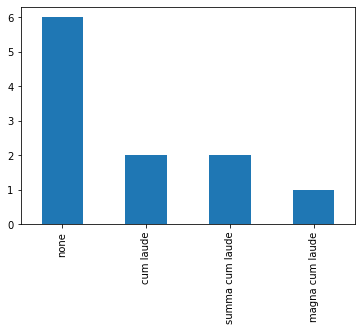

In [34]:
# creating a graph on the number of students in each group
# this really helps with data visualization!
pd.value_counts(students_results_degrees).plot.bar()